# Introduction aux outils numériques

Nous allons faire un survol de quelques commandes que nous utiliserons dans les autres TP numériques. 

## Installation

Pour une installation sur **votre ordinateur personnel** des outils python, je vous conseille d'installer [Anaconda | Individual Edition](https://www.anaconda.com/products/individual-d) ou sa version minimaliste [Miniconda](https://docs.conda.io/en/latest/miniconda.html) avec module `numpy`, `matplotlib` et `jupyter-lab`. Nous utiliserons des `notebook` la plupart du temps pour l'interactivité. Ce sont des fichiers `*.pynb` qui contiennent du texte (_markdown_), du code et son execution (affichage). Ils peuvent facilement être exportés. Les fonctions et classes réutilisées et complexes seront rassemblées dans des modules séparés (fichier texte`*.py`) que nous pourront facilement réutiliser.

Lors des TP numériques en classe, nous préfèrerons une version _cloud_ propulsée par The Pacific Institute for the Mathematical Sciences (PIMS) en collaboration et grace à l'infrastructure de Calcul Canada et Cybera. 

[PIMS Jupyter Lab](https://pims.syzygy.ca/)

Pour y accéder, cela vous prend simplement une authentification avec un compte google (personnel ou `etsmtl.net` si vous l'avez activé). Les modules nécessaires sont déjà tous disponibles.

## Objectifs de cette séance

Comme vous avez tous une formation de base en Matlab, nous allons nous appuyer sur cela pour réaliser quelques opérations simples que nous employerons sur des problèmes d'aérodynamique par la suite. 

Réalisez les exercices avec Matlab et dans ce notebook pour vous familiariser avec les commandes python.

## Modules

Comme Matlab, Python est langage interprété. On s'appuie sur des fonctions pré-compilées pour rendre les opérations de calcul efficace. 

Contrairement à Matlab, les modules ne sont pas chargés automatiquement. Il faut donc toujours importer ce dont on a besoin. Dans le cadre de ce cours, nous aurons besoin essentiellement de `numpy` et `matplotlib`.

[NumPy](https://numpy.org) est une bibliothèque d'objets et de fonctions adaptés au calcul vectoriel c'est-à-dire à des opérations sur des listes ou tableaux (N-dimensions) homogènes de nombres (_array_). Grace à cette bibliothèque, les opérations principales que l'on réalise avec Matlab sont réalisable sous Python. Souvent les fonctions ont le même nom. 

[MatplotLib](https://matplotlib.org/) est une bibliothèque d'objets et de fonctions pour réaliser des représentations graphiques 2D comme dans Matlab (et certainement même plus !). On utilise le sous-module `pyplot` qui contient tout ce dont on a besoin.

Pour charger un module, on utilise la fonction `import` et on lui donne un petit nom pour raccourcir nos appels. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Pour avoir des graphiques de bonne qualité, nous utilisons les paramètres suivants.

In [2]:
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12

Voilà vous êtes prêt ! 

## Exercice 1 - Intersection de deux droites

On souhaite calculer le point d'intersection de deux droites définies par les équations suivantes : 
\begin{equation}
y = 2 x -5 \hspace{2cm} \text{et} \hspace{2cm} 
y = -x + 3
\end{equation}

1. Construisez les tableaux suivants : 
  * `x` de 20 points uniformément répartis de -5 à 5. Utilisez la fonction `linspace` de `numpy`.
  * `y1` et `y2` les ordonnées des points aux abscisses `x` des points sur les droites 1 et 2. 

In [3]:
npts = 20
x = np.linspace(-5,5,npts)
y1 = 2*x-5
y2 = -x + 3

2. Tracez les deux droites ainsi définies : 
  * La droite 1 en bleu, la droite 2 en rouge et en pointillés.
  * Affichez une grille, une légende et des labels sur les axes.

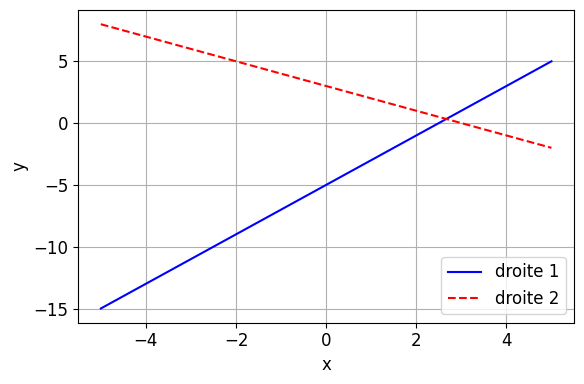

In [4]:
plt.plot(x,y1,label='droite 1',color='blue')
plt.plot(x,y2,label='droite 2',color='red',linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

3. Définissez le problème matriciel $M X = B$ à résoudre pour trouver l'intersection des droites et créez les tableaux numpy `M` et `B`. Utilisez la fonction `array`, vérifiez les formes avec `shape` et utilisez `reshape` pour corriger. 

\begin{equation}
\text{avec : }\hspace{1cm} M = \begin{pmatrix}
-2 & 1 \\
1 & 1 
\end{pmatrix}
\hspace{1cm}  B = \begin{pmatrix}
-5 \\
3 
\end{pmatrix} \hspace{1cm}  X = \begin{pmatrix}
x \\
y \end{pmatrix}
\end{equation}

In [5]:
M = np.array(((-2,1),(1,1)))
B = np.array((-5,3)).reshape((2,1))

4. Résolvez le problème en utilisant le sous-module d'algèbre linéaire [`linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html#solving-equations-and-inverting-matrices) de `numpy`. Le produit matriciel (`dot`) est implémenté avec le symbole `@`

In [6]:
Minv = np.linalg.inv(M)
Xint = Minv @ B

In [7]:
Xint2 = np.linalg.solve(M,B)

5. Reprennez la figure de la question 2 et ajoutez le point d'intersection avec un symbole vert. Si l'intersection n'est pas correcte, vérifiez vos matrices et leurs formes. Enregistrez la figure sous un format image. 

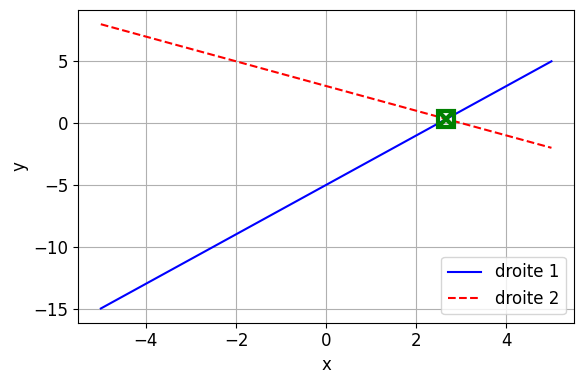

In [8]:
plt.plot(x,y1,label='droite 1',color='blue')
plt.plot(x,y2,label='droite 2',color='red',linestyle='--')
plt.plot(Xint[0],Xint[1],marker='x',color='green',ms=12,markeredgewidth=3.0)
plt.plot(Xint2[0],Xint2[1],marker='s',color='green',ms=12,markeredgewidth=3.0,markerfacecolor = 'None')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.savefig('exercice1.png')
plt.show()